In [1]:


from collections import deque
from typing import List, Optional


In [4]:

# Problem 1.1 — "Writing the general class for this object"
class AlmazTreeNode:
   
    def __init__(self, weight: float, children: Optional[List["AlmazTreeNode"]] = None):
        self.weight = float(weight)
        self.children: List[NaryTreeNode] = children if children is not None else []

    def add_child(self, child: "AlmazTreeNode") -> None:
        """Attach a child node to the current node."""
        self.children.append(child)

    def __repr__(self) -> str:
        """Compact representation for debugging."""
        return f"AlmazTreeNode(weight={self.weight:.4f}, children={len(self.children)})"


In [5]:

# Problem 1.2 — "Generating a tree of depth N = 3, with initial parent tree of weight 1/n"
def build_n_ary_tree(n_children: int, depth: int, root_weight: float) -> AlmazTreeNode:
    def _build_recursive(current_depth: int, weight: float) -> AlmazTreeNode:
        node = AlmazTreeNode(weight)
        if current_depth == depth:
            # Leaf node, no children
            return node
        
        child_weight = weight / n_children
        for _ in range(n_children):
            child = _build_recursive(current_depth + 1, child_weight)
            node.add_child(child)
        return node
    
    return _build_recursive(current_depth=0, weight=root_weight)
N = 3
n_children_example = 3
root_weight_example = 1.0 / (N + 1) 
root_example = build_n_ary_tree(n_children_example, N, root_weight_example)
root_example


AlmazTreeNode(weight=0.2500, children=3)

In [6]:

# Problem 1.3 — "creating a depth first recursive function visiting each node and summing up the weights.
def dfs_sum_weights_recursive(node: Optional[AlmazTreeNode]) -> float:
    if node is None:
        return 0.0
    
    total = node.weight
    for child in node.children:
        total += dfs_sum_weights_recursive(child)
    return total


# Small experiment
depth = 3
root_weight = 1.0 / (depth + 1)  # 1/4
for n_children in [2, 3, 4, 5]:
    root = build_n_ary_tree(n_children=n_children, depth=depth, root_weight=root_weight)
    total_dfs = dfs_sum_weights_recursive(root)
    print(f"n_children={n_children}, DFS total weight={total_dfs:.6f}")


n_children=2, DFS total weight=1.000000
n_children=3, DFS total weight=1.000000
n_children=4, DFS total weight=1.000000
n_children=5, DFS total weight=1.000000


In [7]:

# Problem 1.4
def bfs_sum_weights_iterative(root: Optional[AlmazTreeNode]) -> float:
    if root is None:
        return 0.0
    
    total = 0.0
    queue = deque([root])
    
    while queue:
        node = queue.popleft()
        total += node.weight
        for child in node.children:
            queue.append(child)
    
    return total


# Compare DFS and BFS sums for several n_children
depth = 3
root_weight = 1.0 / (depth + 1)  # still 1/4
for n_children in [2, 3, 4, 5]:
    root = build_n_ary_tree(n_children=n_children, depth=depth, root_weight=root_weight)
    total_dfs = dfs_sum_weights_recursive(root)
    total_bfs = bfs_sum_weights_iterative(root)
    print(f"n_children={n_children}, DFS={total_dfs:.6f}, BFS={total_bfs:.6f}")


n_children=2, DFS=1.000000, BFS=1.000000
n_children=3, DFS=1.000000, BFS=1.000000
n_children=4, DFS=1.000000, BFS=1.000000
n_children=5, DFS=1.000000, BFS=1.000000


In [8]:

# Problem 1.5 
def dfs_alternating_sum(node: Optional[AlmazTreeNode]) -> float:
    sign = 1
    total = 0.0
    
    def _dfs(current: AlmazTreeNode):
        nonlocal sign, total
        # Visit current node
        total += sign * current.weight
        sign *= -1
        
        # Recurse on children
        for child in current.children:
            _dfs(child)
    
    if node is not None:
        _dfs(node)
    return total


def bfs_alternating_sum(root: Optional[AlmazTreeNode]) -> float:
    if root is None:
        return 0.0
    
    sign = 1
    total = 0.0
    queue = deque([root])
    
    while queue:
        node = queue.popleft()
        total += sign * node.weight
        sign *= -1
        for child in node.children:
            queue.append(child)
    
    return total

# Example test for fixed n_children
depth = 3
n_children = 3
root_weight = 1.0 / (depth + 1)  
root = build_n_ary_tree(n_children=n_children, depth=depth, root_weight=root_weight)

plain_sum_dfs = dfs_sum_weights_recursive(root)
plain_sum_bfs = bfs_sum_weights_iterative(root)
alt_sum_dfs = dfs_alternating_sum(root)
alt_sum_bfs = bfs_alternating_sum(root)

print(f"Plain DFS sum = {plain_sum_dfs:.6f}")
print(f"Plain BFS sum = {plain_sum_bfs:.6f}")
print(f"Alternating DFS sum = {alt_sum_dfs:.6f}")
print(f"Alternating BFS sum = {alt_sum_bfs:.6f}")


Plain DFS sum = 1.000000
Plain BFS sum = 1.000000
Alternating DFS sum = 0.222222
Alternating BFS sum = 0.185185


In [9]:

# Problem 1.6

def bfs_iterative_collect(root: Optional[AlmazTreeNode]) -> float:
    return bfs_sum_weights_iterative(root)

def bfs_recursive_collect(root: Optional[AlmazTreeNode]) -> float:
    if root is None:
        return 0.0
    
    def _bfs_level(queue: List[AlmazTreeNode]) -> float:
    
        if not queue:
            return 0.0
        level_sum = 0.0
        next_level: List[NaryTreeNode] = []
        for node in queue:
            level_sum += node.weight
            next_level.extend(node.children)
        
        # Recurse to the next level
        return level_sum + _bfs_level(next_level)
    
    return _bfs_level([root])

# Checking
depth = 3
root_weight = 1.0 / (depth + 1)
for n_children in [2, 3, 4]:
    root = build_n_ary_tree(n_children=n_children, depth=depth, root_weight=root_weight)
    it_sum = bfs_iterative_collect(root)
    rec_sum = bfs_recursive_collect(root)
    print(f"n_children={n_children}, BFS iterative={it_sum:.6f}, BFS recursive={rec_sum:.6f}")


n_children=2, BFS iterative=1.000000, BFS recursive=1.000000
n_children=3, BFS iterative=1.000000, BFS recursive=1.000000
n_children=4, BFS iterative=1.000000, BFS recursive=1.000000


In [12]:
# Helper to collect nodes by levels (for visualisation)

from collections import deque
import matplotlib.pyplot as plt

def collect_levels(root: AlmazTreeNode):
    if root is None:
        return {}
    
    levels = {}
    queue = deque([(root, 0)])  # (node, depth)
    
    while queue:
        node, depth = queue.popleft()
        if depth not in levels:
            levels[depth] = []
        levels[depth].append(node)
        
        for child in node.children:
            queue.append((child, depth + 1))
    
    return levels


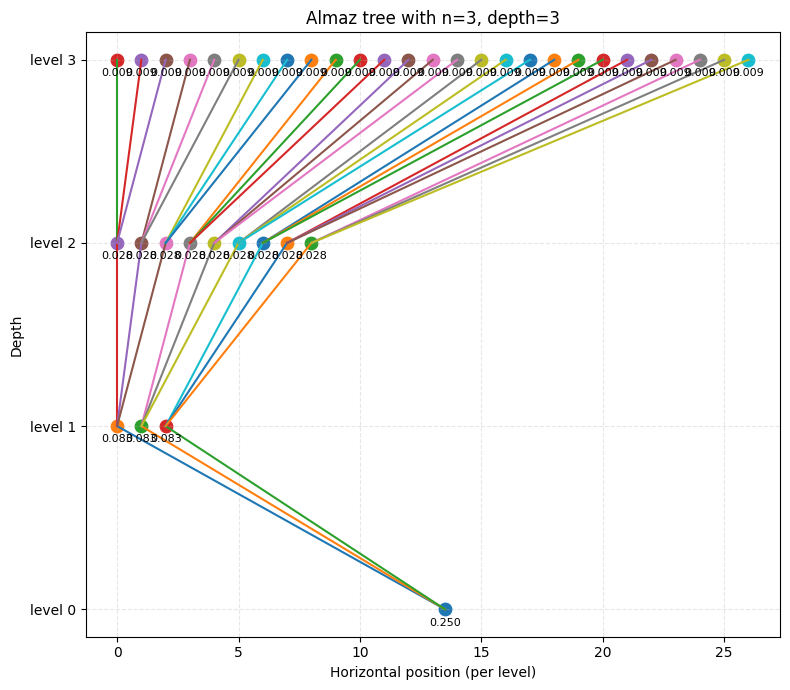

In [14]:


def plot_almaz_tree(root: AlmazTreeNode, title: str = "Almaz tree"):
   
    levels = collect_levels(root)
    if not levels:
        print("Empty tree")
        return
    

    positions = {}  
    
    max_width = max(len(nodes) for nodes in levels.values())
    max_depth = max(levels.keys())
    
    for depth, nodes_at_level in levels.items():
        # Spread nodes evenly across [0, max_width - 1]
        num_nodes = len(nodes_at_level)
        if num_nodes == 1:
            xs = [max_width / 2.0]  # centre single node
        else:
            xs = list(range(num_nodes))
        
        y = -depth  # deeper levels go lower (more negative)
        for i, node in enumerate(nodes_at_level):
            x = xs[i]
            positions[node] = (x, y)
    
    # Plot
    fig, ax = plt.subplots(figsize=(8, 4 + max_depth))
    
    # Draw edges first
    for parent, (px, py) in positions.items():
        for child in parent.children:
            cx, cy = positions[child]
            ax.plot([px, cx], [py, cy])
    
    # Draw nodes and labels
    for node, (x, y) in positions.items():
        ax.scatter([x], [y], s=80)
        ax.text(
            x, y + 0.1,
            f"{node.weight:.3f}",
            ha="center",
            va="bottom",
            fontsize=8
        )
    
    ax.set_title(title)
    ax.set_xlabel("Horizontal position (per level)")
    ax.set_ylabel("Depth")
    ax.set_yticks([-d for d in range(max_depth + 1)])
    ax.set_yticklabels([f"level {d}" for d in range(max_depth + 1)])
    ax.invert_yaxis()  # so that level 0 is on top
    ax.grid(True, linestyle="--", alpha=0.3)
    
    plt.tight_layout()
    plt.show()


depth = 3
n_children = 3
root_weight = 1.0 / (depth + 1)  # total sum of weights = 1
root_for_plot = build_n_ary_tree(n_children=n_children, depth=depth, root_weight=root_weight)

plot_almaz_tree(root_for_plot, title=f"Almaz tree with n={n_children}, depth={depth}")
